# Untuk Experiment

In [1]:
import cv2
from matplotlib import pyplot as plt

In [5]:
image_file = "../data/nota_pensmart.jpeg"
image_mat = cv2.imread(image_file)

In [6]:
def display_img(im_data, dpi=80):
    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

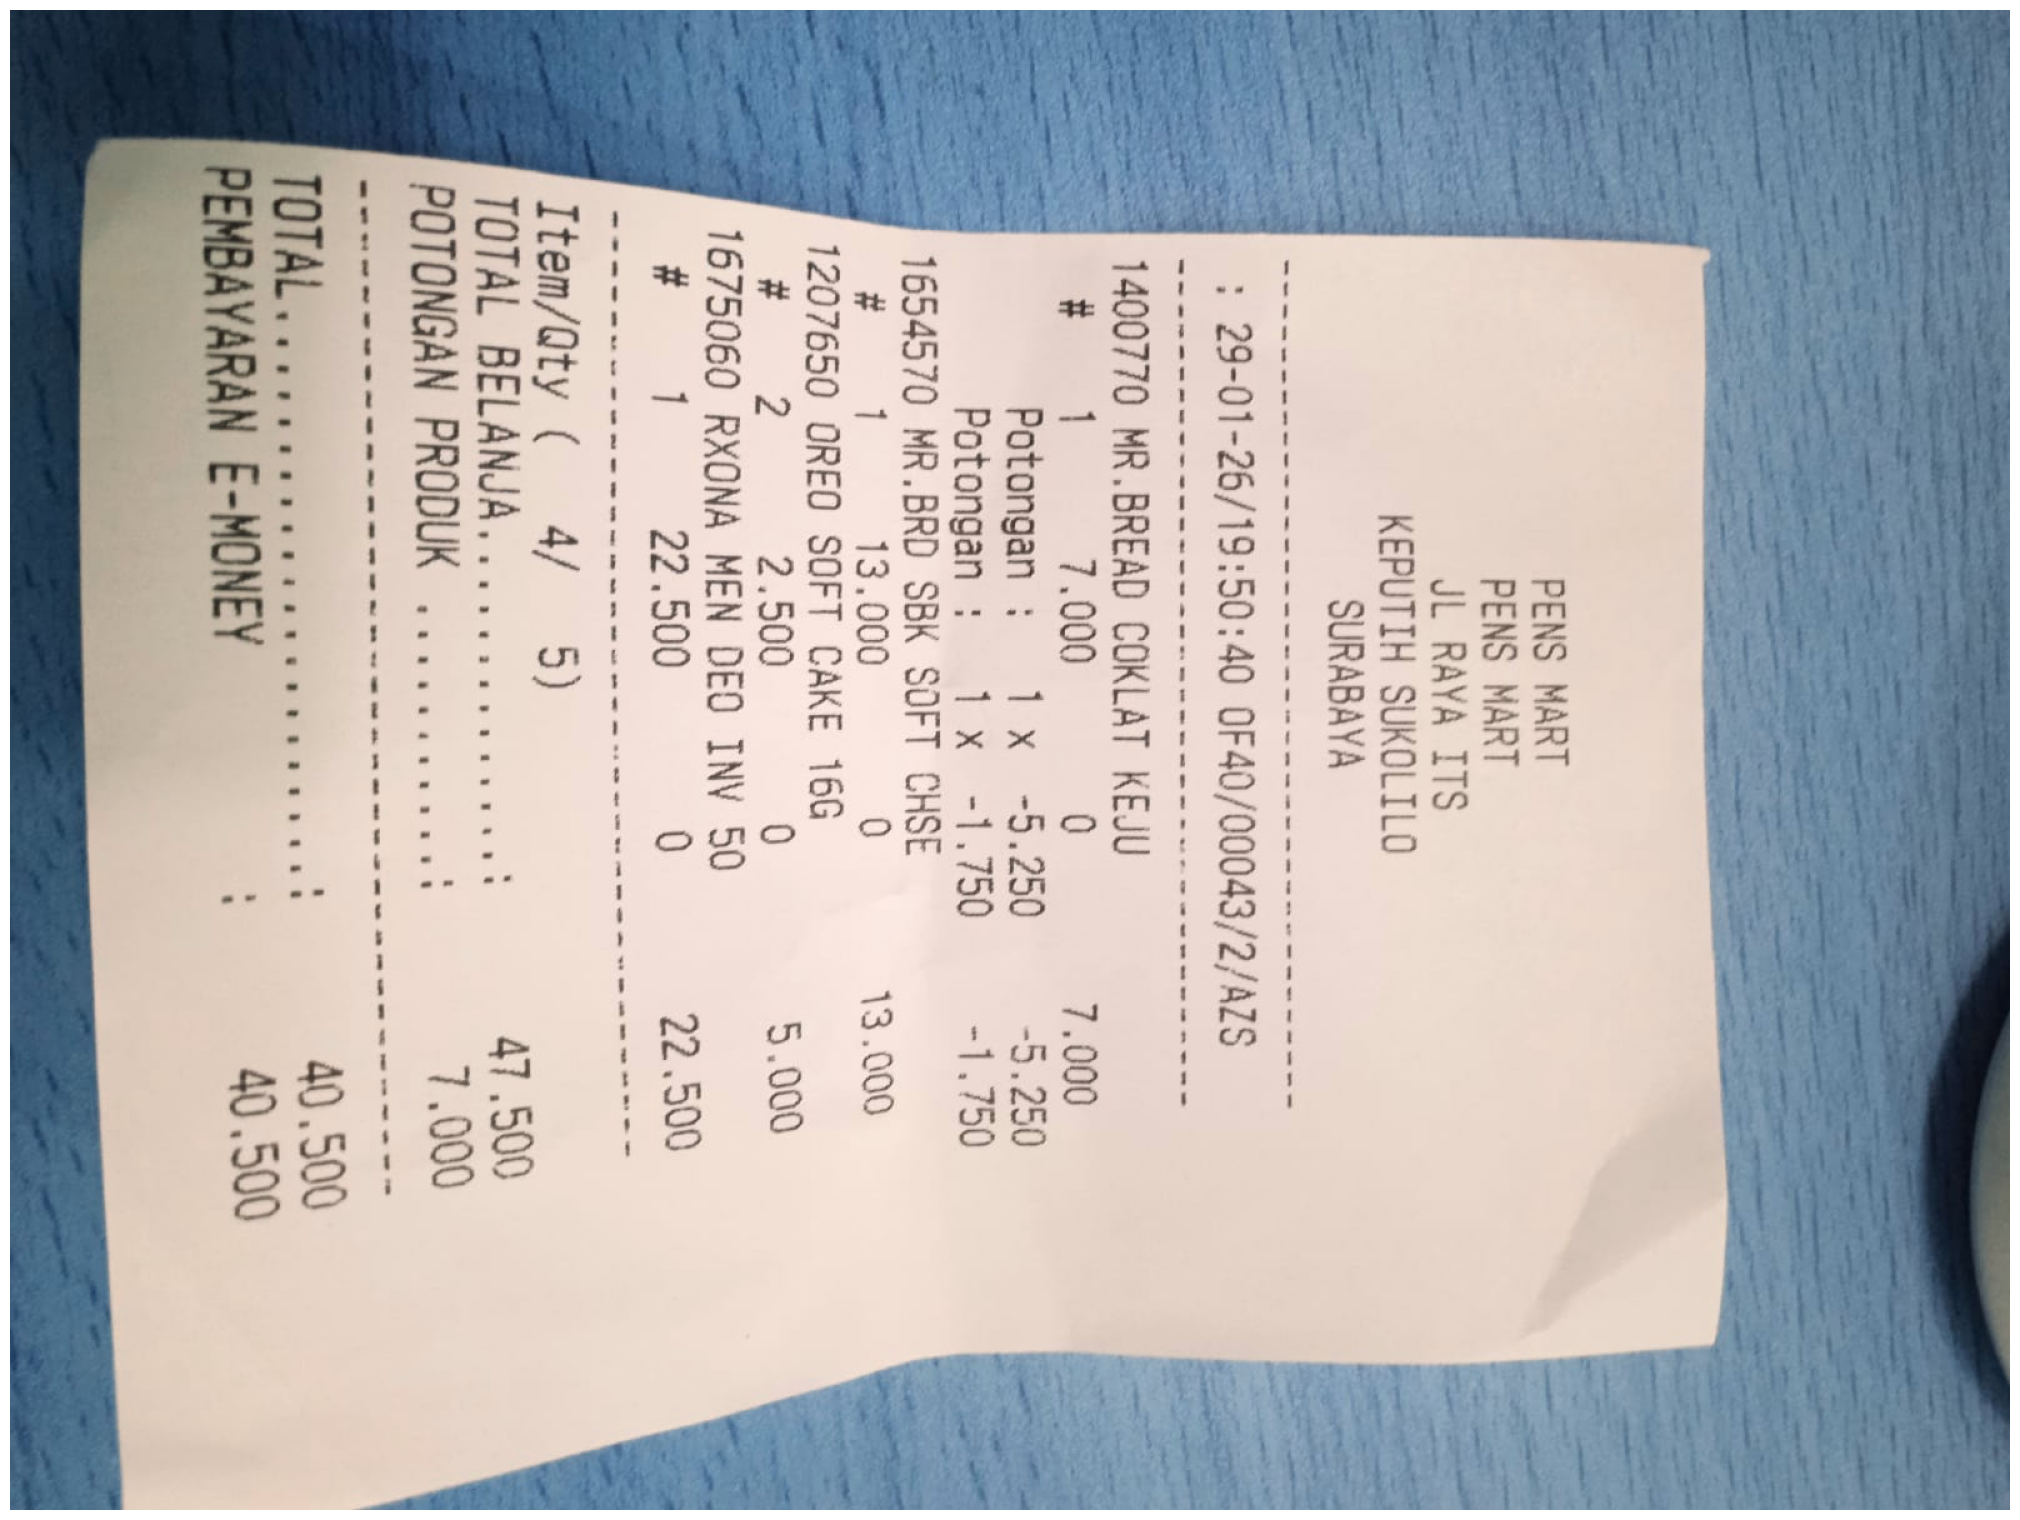

In [7]:
display_img(image_mat)

## Donut Model

In [10]:
import torch
import xmltodict
import re
from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq, DonutProcessor, VisionEncoderDecoderModel

In [11]:
model_name = "naver-clova-ix/donut-base-finetuned-cord-v2"
processor = AutoProcessor.from_pretrained(model_name)
model = AutoModelForVision2Seq.from_pretrained(model_name)  

### Preprocessing

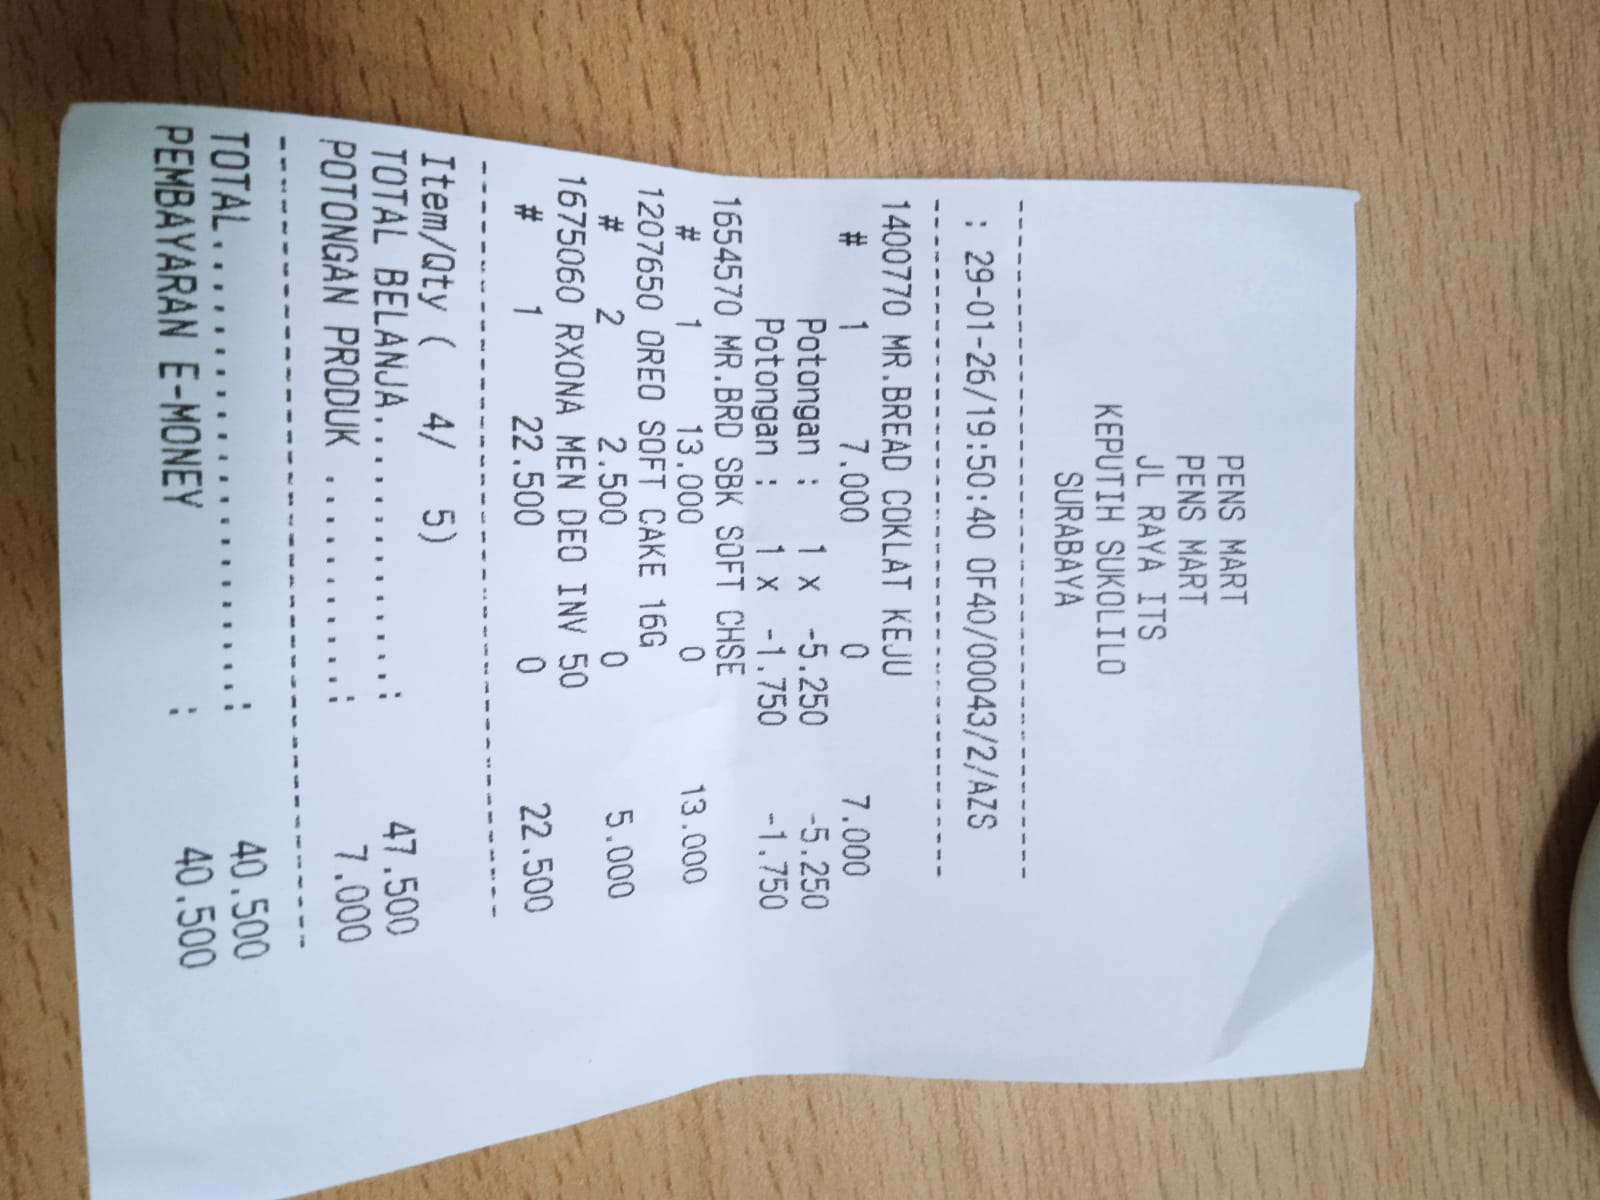

In [25]:
image = Image.open(image_file).convert("RGB")
image

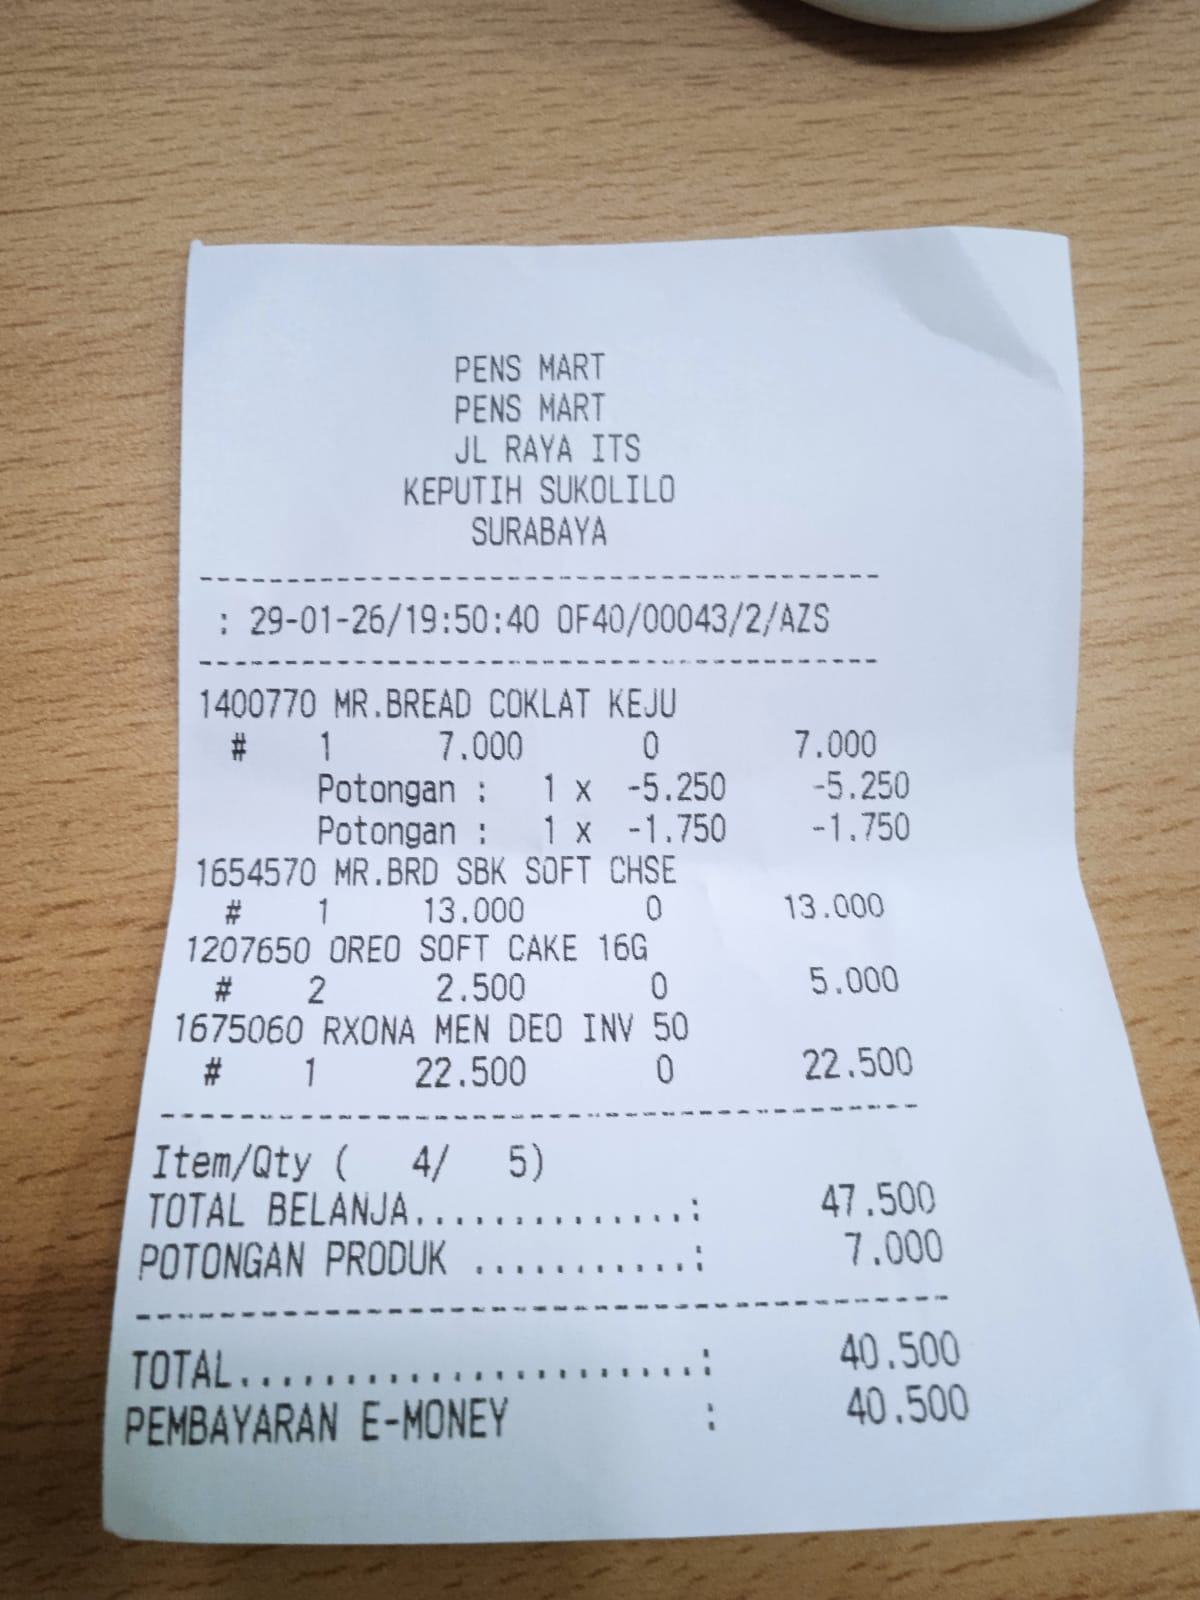

In [26]:
image = image.rotate(90, expand=True)
image

In [27]:
decoder_input_id = processor.tokenizer("<s_cord-v2>", add_special_tokens=False).input_ids
decoder_input_id

[57579]

In [28]:
decoder_input_id = torch.tensor(decoder_input_id).unsqueeze(0)
decoder_input_id

tensor([[57579]])

In [29]:
pixel_values = processor(image, return_tensors="pt").pixel_values
pixel_values

tensor([[[[ 0.0196,  0.0196,  0.0039,  ...,  0.1451,  0.1294,  0.1137],
          [ 0.0431,  0.0431,  0.0353,  ...,  0.1451,  0.1294,  0.1216],
          [ 0.0275,  0.0353,  0.0353,  ...,  0.1608,  0.1451,  0.1294],
          ...,
          [-0.5059, -0.5059, -0.4902,  ...,  0.0353,  0.0510,  0.0510],
          [-0.4902, -0.4902, -0.4745,  ...,  0.0275,  0.0431,  0.0353],
          [-0.4824, -0.4745, -0.4510,  ...,  0.0275,  0.0353,  0.0275]],

         [[-0.1686, -0.1686, -0.1843,  ..., -0.0196, -0.0353, -0.0510],
          [-0.1451, -0.1451, -0.1529,  ..., -0.0196, -0.0353, -0.0431],
          [-0.1608, -0.1529, -0.1529,  ..., -0.0039, -0.0196, -0.0353],
          ...,
          [-0.6471, -0.6471, -0.6314,  ..., -0.1922, -0.1765, -0.1765],
          [-0.6314, -0.6314, -0.6157,  ..., -0.2000, -0.1843, -0.1922],
          [-0.6235, -0.6157, -0.5922,  ..., -0.2000, -0.1922, -0.2000]],

         [[-0.3569, -0.3569, -0.3725,  ..., -0.1843, -0.2000, -0.2157],
          [-0.3333, -0.3333, -

### Inference

In [30]:
output = model.generate(
            pixel_values,
            decoder_input_ids = decoder_input_id,
            max_length = model.decoder.config.max_position_embeddings,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

output

GenerateEncoderDecoderOutput(sequences=tensor([[57579, 57526, 57528, 40883, 35544, 34837, 42036, 57527, 57560, 20974,
         11225, 53821,  6899, 57559, 57530, 52744, 53958, 57529, 57532, 52744,
         53958, 57527, 57532,  5517, 34299,  1921, 53278, 15844,  9598,  2403,
         16212, 57527, 57547, 57522, 57528,  2866, 42684, 11225, 57527, 57547,
         57522, 57528, 16209, 44781, 43423, 54445, 28221, 26957, 57527, 57566,
         36493, 35192, 47106, 56239,  3951,  6215, 47106, 16603, 35544, 57527,
         57566, 46680, 51344, 45384, 57565, 57560, 38100, 53692, 57559, 57530,
         50891, 57529, 57532, 38100, 53692, 57531, 57522, 57528, 48092, 18581,
         47735, 12161, 20220, 50934, 39539, 28790, 57559, 57530,  1314,   568,
         57529, 57532, 20220, 50934, 39539, 28790, 57531, 57522, 57528, 48092,
         18581, 47735, 12161, 48918, 39539, 45567, 57527, 57560, 48918, 39539,
         45567, 57559, 57530,  1314,   568, 57529, 57532, 48918, 35815, 45567,
         5753

### Post-Processing

In [36]:
decoded_sequence = processor.batch_decode(output.sequences)[0]
decoded_sequence

'<s_cord-v2><s_menu><s_nm> PENS MART</s_nm><s_unitprice> RAYA ITS</s_unitprice><s_cnt> JL</s_cnt><s_price> JL</s_nm><s_price> KEPUTIH SUKOLILO</s_nm></s_sub><sep/><s_nm> SURABAYA</s_nm></s_sub><sep/><s_nm> 29-01-26/19:50:40</s_nm><s_num> OF40/00043/2/AZS</s_nm><s_num> 1400770</s_num><s_unitprice> 7.000</s_unitprice><s_cnt> 0</s_cnt><s_price> 7.000</s_price><sep/><s_nm> Potongan : -5.250</s_unitprice><s_cnt> 1 x</s_cnt><s_price> -5.250</s_price><sep/><s_nm> Potongan : -1.750</s_nm><s_unitprice> -1.750</s_unitprice><s_cnt> 1 x</s_cnt><s_price> -1,750</s_price><sep/><s_nm> 1654570 MR.BRD SBK SOFT CHSE</s_nm><s_unitprice> 13.000</s_unitprice><s_cnt> 1</s_cnt><s_price> 13.000</s_price><sep/><s_nm> OREO SOFT CAKE 16G</s_nm><s_num> 1207650</s_num><s_unitprice> 2.500</s_unitprice><s_cnt> 0</s_cnt><s_price> 5.000</s_price><s_sub><s_nm> #</s_nm></s_sub><sep/><s_nm> RXONA MEN DEO INV 50</s_nm><s_num> 1675060</s_num><s_unitprice> 22.500</s_unitprice><s_cnt> 0</s_cnt><s_price> 22.500</s_price></s_m

In [38]:
print(decoded_sequence)
dict_ = processor.token2json(decoded_sequence)
dict_

<s_cord-v2><s_menu><s_nm> PENS MART</s_nm><s_unitprice> RAYA ITS</s_unitprice><s_cnt> JL</s_cnt><s_price> JL</s_nm><s_price> KEPUTIH SUKOLILO</s_nm></s_sub><sep/><s_nm> SURABAYA</s_nm></s_sub><sep/><s_nm> 29-01-26/19:50:40</s_nm><s_num> OF40/00043/2/AZS</s_nm><s_num> 1400770</s_num><s_unitprice> 7.000</s_unitprice><s_cnt> 0</s_cnt><s_price> 7.000</s_price><sep/><s_nm> Potongan : -5.250</s_unitprice><s_cnt> 1 x</s_cnt><s_price> -5.250</s_price><sep/><s_nm> Potongan : -1.750</s_nm><s_unitprice> -1.750</s_unitprice><s_cnt> 1 x</s_cnt><s_price> -1,750</s_price><sep/><s_nm> 1654570 MR.BRD SBK SOFT CHSE</s_nm><s_unitprice> 13.000</s_unitprice><s_cnt> 1</s_cnt><s_price> 13.000</s_price><sep/><s_nm> OREO SOFT CAKE 16G</s_nm><s_num> 1207650</s_num><s_unitprice> 2.500</s_unitprice><s_cnt> 0</s_cnt><s_price> 5.000</s_price><s_sub><s_nm> #</s_nm></s_sub><sep/><s_nm> RXONA MEN DEO INV 50</s_nm><s_num> 1675060</s_num><s_unitprice> 22.500</s_unitprice><s_cnt> 0</s_cnt><s_price> 22.500</s_price></s_me

{'menu': [{'nm': 'PENS MART',
   'unitprice': 'RAYA ITS',
   'cnt': 'JL',
   'price': {'nm': '29-01-26/19:50:40', 'unitprice': '7.000', 'cnt': '0'}},
  {'nm': {'cnt': '1 x', 'price': '-5.250'},
   'unitprice': '-1.750',
   'cnt': '1 x',
   'price': '-1,750'},
  {'nm': '1654570 MR.BRD SBK SOFT CHSE',
   'unitprice': '13.000',
   'cnt': '1',
   'price': '13.000'},
  {'nm': 'OREO SOFT CAKE 16G',
   'num': '1207650',
   'unitprice': '2.500',
   'cnt': '0',
   'price': '5.000',
   'sub': {'nm': '#'}},
  {'nm': 'RXONA MEN DEO INV 50',
   'num': '1675060',
   'unitprice': '22.500',
   'cnt': '0',
   'price': '22.500'}],
 'sub_total': {'subtotal_price': '47.500', 'discount_price': '7.000'},
 'total': {'total_price': '40.500',
  'creditcardprice': '40.500',
  'menuqty_cnt': '4/'}}

In [40]:
dict_["total"]['total_price']

'40.500'

## Florence-2-base

In [41]:
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM

In [595]:
model = AutoModelForCausalLM.from_pretrained(
            "microsoft/Florence-2-base-ft", 
            trust_remote_code=True,
            dtype=torch.float32, 
            device_map="cpu",
            attn_implementation="eager"
            )

processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True)

<unknown>:515: SyntaxWarning: invalid escape sequence '\d'


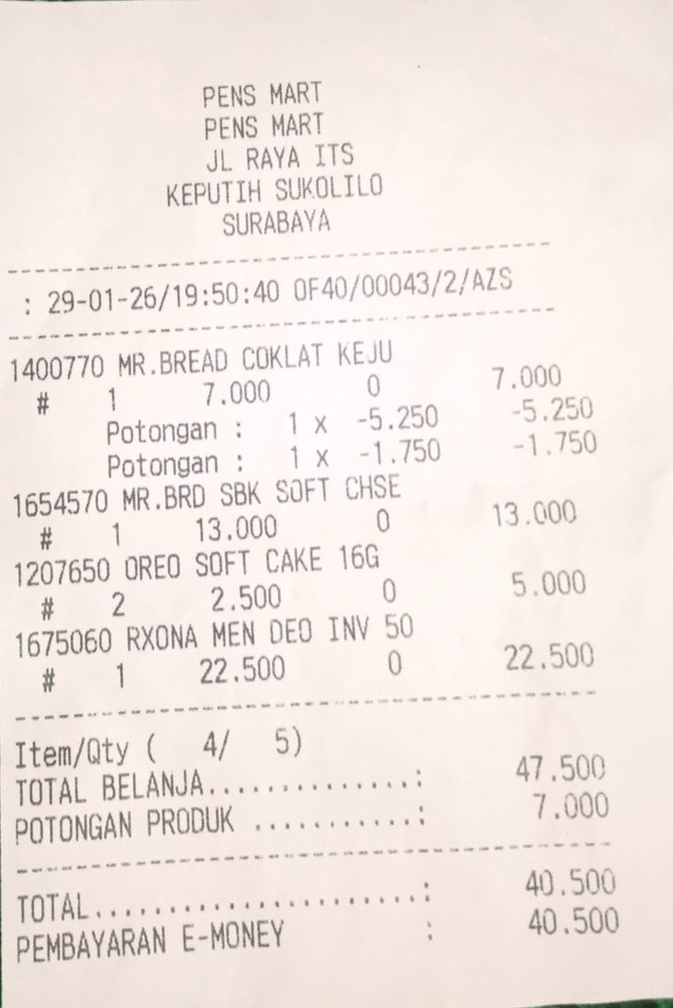

In [596]:
image = Image.open("../data/rotated2.jpg").convert("RGB")
image

In [597]:
inputs = processor(text="<OCR>", images=image, return_tensors="pt").to("cpu", torch.float32)
inputs

{'input_ids': tensor([[   0, 2264,   16,    5, 2788,   11,    5, 2274,  116,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[ 1.6324,  1.4954,  1.3584,  ...,  1.8893,  1.8722,  1.8722],
          [ 1.8893,  1.8722,  1.9064,  ...,  1.9235,  1.9578,  1.9407],
          [ 1.8893,  1.8208,  1.8893,  ...,  1.9235,  1.9920,  1.9578],
          ...,
          [-1.5528, -0.6452,  0.6563,  ..., -1.3987, -1.4500, -1.4672],
          [-1.3302, -0.3027,  0.8789,  ..., -1.4500, -1.5357, -1.5870],
          [-1.2617, -0.3712,  0.9988,  ..., -1.5870, -1.6898, -1.6898]],

         [[ 1.7458,  1.5882,  1.4657,  ...,  1.8683,  1.8859,  1.9209],
          [ 1.9734,  1.9384,  1.9909,  ...,  1.8859,  1.9384,  1.9559],
          [ 1.9034,  1.8683,  1.9209,  ...,  1.8683,  1.9384,  1.9559],
          ...,
          [-1.0728, -0.1975,  1.0455,  ..., -0.4951, -0.5651, -0.6001],
          [-0.8452,  0.1527,  1.2381,  ..., -0.6001, -0.6877, -0.7577],
          [-0.

In [598]:
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    do_sample=False,
    num_beams=3,
    use_cache=False
)

In [599]:
generated_ids

tensor([[    2,     0,   510, 12743,   256, 11328,   863,   574,   248,  2547,
           250, 27409,   530,  9662,  6972,   100,   725,  9557,   530,  3384,
          3063,  3196,  2492,  4546,  2547,   250,  4832,  1132,    12,  2663,
            12,  2481,    73,  1646,    35,  1096,    35,  1749,  3243,  1749,
            73,   151,  3897,    73,   176,    73, 15134,   104,  1570,   612,
          4718,  3083, 18838,     4,   387, 29825,  6247,   530,   574,  2571,
         37112,   863,   791,   406,     4,   151,   406,     4, 27623,   406,
             4, 14200, 35516,  1657,   260,  4832,   134,  3023,   111,   245,
             4,  5714,    12,   245,     6,  5714, 35516,  1097,   260,   112,
          3023,   111,   134,     4, 10569,    12,   134,     6, 10569, 21933,
          1898,  3083,   427,     4,  6823,   387,   530, 13910, 11615,  3858,
          3388,  1558,     4,   151,  1092,  3570, 16316,   384,  4629,   673,
         13910, 11615,  5267,  6961,   545,   534,  

In [600]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
generated_text

'</s><s>PENS MARTJL RAYA ITSKEPUTIH SUKOLILOSURABAYA : 29-01-26/19:50:40 OF40/00043/2/AZS14007770 MR.BREAD COKLAT KEJU7.0007.00017.0000Potongan :1 x -5.250-5,250Potangan 1 x -1.750-1,7501654570 Mr. BRBK SOFT CHSE13.0001207650 OREO SOFT CAKE 16G5.00012.500167560 RXONA MEN DEO INV 5022.500#22.5000Item/Qty (4/5)47.500TOTAL BELANJA.7.500POTONGAN PRODUKTOTAL40.500pEMBAYARAN E-MONEY40.5000</s>'

In [601]:
parsed_answer = processor.post_process_generation(generated_text, task="<OCR>", image_size=(image.width, image.height))
parsed_answer

{'<OCR>': 'PENS MARTJL RAYA ITSKEPUTIH SUKOLILOSURABAYA : 29-01-26/19:50:40 OF40/00043/2/AZS14007770 MR.BREAD COKLAT KEJU7.0007.00017.0000Potongan :1 x -5.250-5,250Potangan 1 x -1.750-1,7501654570 Mr. BRBK SOFT CHSE13.0001207650 OREO SOFT CAKE 16G5.00012.500167560 RXONA MEN DEO INV 5022.500#22.5000Item/Qty (4/5)47.500TOTAL BELANJA.7.500POTONGAN PRODUKTOTAL40.500pEMBAYARAN E-MONEY40.5000'}

# Experiment

## Warp Perspective

In [ ]:
import cv2
import numpy as np

def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

def robust_receipt_scanner(img_array):
    # 1. Resize
    orig = img_array.copy()
    ratio = img_array.shape[0] / 500.0
    h = 500
    w = int(img_array.shape[1] / ratio)
    img_small = cv2.resize(img_array, (w, h))

    # Convert ke HSV
    hsv = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    
    # Kertas putih ciri-ciri: Saturation RENDAH, Value TINGGI.
    # S: 0-255 (Makin kecil makin pudar/putih)
    # V: 0-255 (Makin gede makin terang)
    
    # Saturation (hsv[:,:,1])
    saturation = hsv[:,:,1]
    
    _, binary = cv2.threshold(saturation, 40, 255, cv2.THRESH_BINARY_INV)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    cnts, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
    
    screenCnt = None
    
    for c in cnts:
        peri = cv2.arcLength(c, True)
        # Mainkan epsilon. 0.02 standar, kalau hasilnya mletot coba naik/turun dikit
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        # Cari yang punya 4 sudut
        if len(approx) == 4:
            screenCnt = approx
            break
            
    # --- FALLBACK: Kalau gagal nemu 4 sudut ---
    # Paksa pake Bounding Rect dari kontur terbesar
    if screenCnt is None and len(cnts) > 0:
        print("Gagal nemu 4 sudut presisi, pake bounding box biasa.")
        rect = cv2.minAreaRect(cnts[0])
        box = cv2.boxPoints(rect)
        screenCnt = np.int0(box)

    if screenCnt is None:
        return orig

    screenCnt = screenCnt.astype("float32") * ratio
    
    
    warped = four_point_transform(orig, screenCnt.reshape(4, 2))
    
    return warped


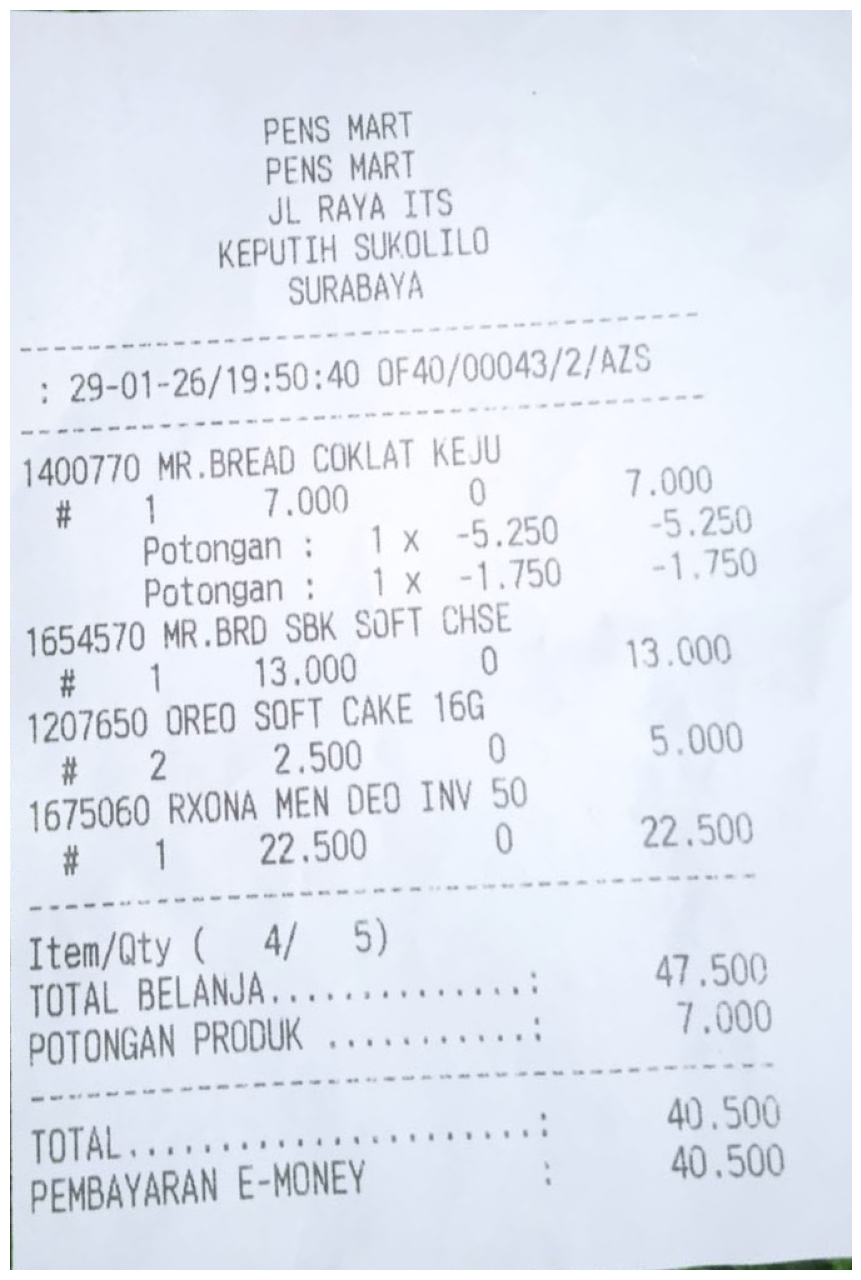

In [585]:
img = cv2.imread("../data/nota_45.jpeg", cv2.IMREAD_COLOR_RGB)
hasil = robust_receipt_scanner(img)
display_img(hasil)

In [586]:
# %pip install scikit-image

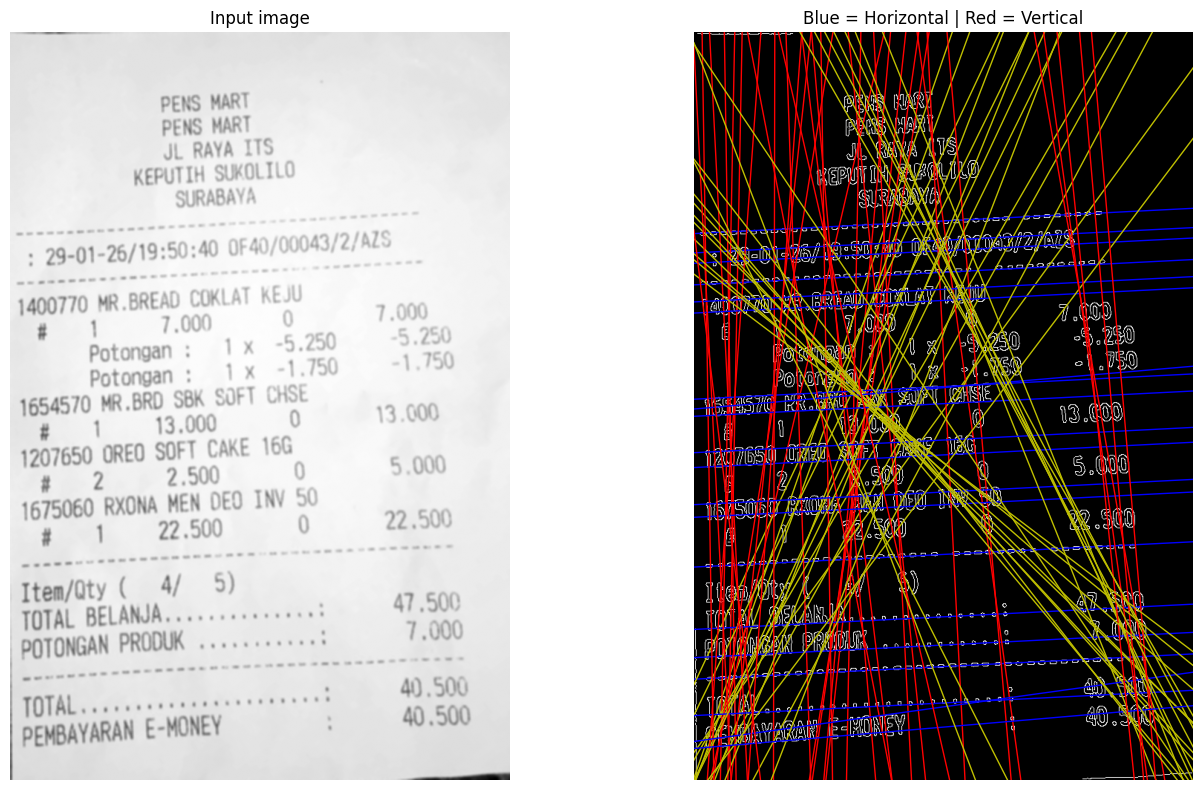

Total lines      : 87
Horizontal lines : 20
Vertical lines   : 34


In [587]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.color import rgb2gray

# ======================
# LOAD IMAGE
# ======================
# image = cv2.imread("hasil_warp.png")
image = hasil.copy()
assert image is not None, "gambar gak kebaca"

image = cv2.blur(image, (4, 4))
gray = rgb2gray(image)

# ======================
# EDGE DETECTION
# ======================
edges = canny(gray)

# ======================
# HOUGH TRANSFORM
# ======================
tested_angles = np.deg2rad(np.arange(0.1, 180.0))
h, theta, d = hough_line(edges, theta=tested_angles)

# ======================
# VISUALIZATION
# ======================
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax = axes.ravel()

ax[0].imshow(gray, cmap="gray")
ax[0].set_title("Input image")
ax[0].axis("off")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Blue = Horizontal | Red = Vertical")
ax[1].axis("off")

origin = np.array((0, edges.shape[1]))

# ======================
# DRAW *ALL* LINES (NO FILTER)
# ======================
accums, angles, dists = hough_line_peaks(h, theta, d)

horizontal_lines = []
vertical_lines = []
diagonal_lines = []

for angle, dist in zip(angles, dists):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    angle_deg = np.rad2deg(angle)

    if 75 <= angle_deg <= 105:
        # horizontal
        color = 'b'
        horizontal_lines.append((angle, angle_deg, dist))

    elif angle_deg <= 15 or angle_deg >= 165:
        # vertical
        color = 'r'
        vertical_lines.append((angle, angle_deg, dist))

    else:
        # diagonal
        color = 'y'
        diagonal_lines.append((angle, angle_deg, dist))

    ax[1].plot(origin, (y0, y1), color, linewidth=1)


ax[1].set_xlim(0, edges.shape[1])
ax[1].set_ylim(edges.shape[0], 0)

plt.tight_layout()
plt.show()

print(f"Total lines      : {len(angles)}")
print(f"Horizontal lines : {len(horizontal_lines)}")
print(f"Vertical lines   : {len(vertical_lines)}")


In [588]:
# display([t[1] for t in horizontal_lines])
# vertical_lines
[t[1] for t in horizontal_lines]

[np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(87.10000000000001),
 np.float64(82.1),
 np.float64(85.1),
 np.float64(85.1)]

In [589]:
def get_mean_error(data):
    median = np.median(data)
    mean_error = np.mean([abs(t - median) for t in data])

    return median, mean_error

def normalize_vertical_angle(angle_deg):
    if angle_deg > 90:
        return angle_deg - 180
    return angle_deg


In [590]:
v_median, v_mean_error = get_mean_error([normalize_vertical_angle(t[1]) for t in vertical_lines])

print(f'v median : {v_median}')
print(f'v mean error : {v_mean_error}')

h_median, h_mean_error = get_mean_error([t[1] for t in horizontal_lines])

print(f'h median : {h_median}')
print(f'h mean error : {h_mean_error}')

v median : -2.4000000000000057
v mean error : 5.0
h median : 87.10000000000001
h mean error : 0.4500000000000021


In [591]:
v_rotate = [90, -90]
h_rotate = [0, 180]

In [592]:
img_rotate = []
if (v_mean_error < h_mean_error):
    img_rotate = v_rotate
    print(f"kertasnnya miring, opsi rotasi : {img_rotate}, salah rotasi maka kertas kebalik")
else:
    img_rotate = h_rotate
    print(f"kertasnnya udah potrait, opsi rotasi : {img_rotate}, salah rotasi maka kertas kebalik")

kertasnnya udah potrait, opsi rotasi : [0, 180], salah rotasi maka kertas kebalik


### OPSI B

In [ ]:
import numpy as np
import cv2

def choose_rotation(img, candidates):
    
    best_rotation = candidates[0]
    best_score = -1
    
    for angle in candidates:
        if angle == 0:
            rotated = img
        elif angle == 90:
            rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        elif angle == -90:
            rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        else:
            rotated = cv2.rotate(img, cv2.ROTATE_180)
        
        gray = cv2.cvtColor(rotated, cv2.COLOR_RGB2GRAY)
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        
        h_projection = np.sum(binary, axis=1)
        h_variance = np.var(h_projection)
        
        h_mean = np.mean(h_projection)
        h_peaks = np.sum(h_projection > h_mean * 1.5)
        
        score = h_variance * 0.5 + h_peaks * 50
        
        print(f"{angle:4d}°: score={score:.1f}")
        
        if score > best_score:
            best_score = score
            best_rotation = angle
    
    return best_rotation



In [594]:
best_rotation = choose_rotation(hasil, img_rotate)

if best_rotation == 90:
    corrected = cv2.rotate(hasil, cv2.ROTATE_90_CLOCKWISE)
elif best_rotation == -90:
    corrected = cv2.rotate(hasil, cv2.ROTATE_90_COUNTERCLOCKWISE)
elif best_rotation == 180:
    corrected = cv2.rotate(hasil, cv2.ROTATE_180)
else:
    corrected = hasil

cv2.imwrite("../data/rotated2.jpg", corrected)

   0°: score=39950091.3
 180°: score=39950091.3


True